<a href="https://colab.research.google.com/github/raleight1/Forecasting-Nonseasonal-and-Seasonal/blob/main/F%26S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Background and Data Source**

For our non seasonal project we chose daily rainfall measurements for the year 2025 so far, we stored this in a csv/excel format. The dataset has 59 observations.
We chose this data because since we live in Ireland were always surrounded by rain, and with Irish weathers there’s so much change and uncertainty it’s hard to find a clear cut pattern. So we though it makes it a good suitable candidate for the nonseasonal time series model.
The dataset shows daily fluctuations and is relevant to Irish life impacting aguculture, tourism and commuting. From a model perspective its irregular and challenging ot predict which is good for arima forecasting.

URL: https://www.met.ie/climate/available-data/historical-data

# Data Overview
Variable : Daily rainfall in millimetres

Time Period : January 1st 2025 – February 28th 2025

Frequency : Daily

Observations : 59

# Purpose of analysis

The aim for us is to identify and fit a nonseasonal time series model using the daily precipitation data then use it to make short term forecasts. It will help us understand how the rainfall evolves over time.




Milestone 1:

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook
from itertools import product
from typing import Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
data = '/content/Percipitation Data(Sheet1).csv'

df = pd.read_csv(data)
df.head()



,date,rain
0,1-Jan-25,5.9
1,2-Jan-25,0.0
2,3-Jan-25,0.0
3,4-Jan-25,5.8
4,5-Jan-25,26.2


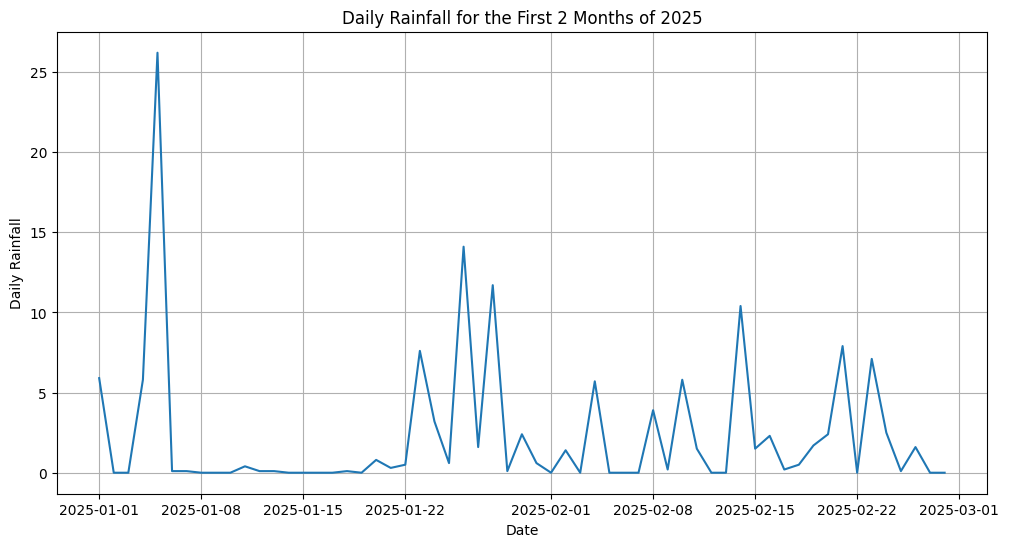

In [ ]:
# Convert the 'Date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

# Create the time series plot
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['rain'])
plt.xlabel('Date')
plt.ylabel('Daily Rainfall')
plt.title('Daily Rainfall for the First 2 Months of 2025')
plt.grid(True)
plt.show()


Milestone 2:

In [ ]:
ad_fuller_result = adfuller(df['rain'])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -4.911397462092869
p-value: 3.3135973454435604e-05


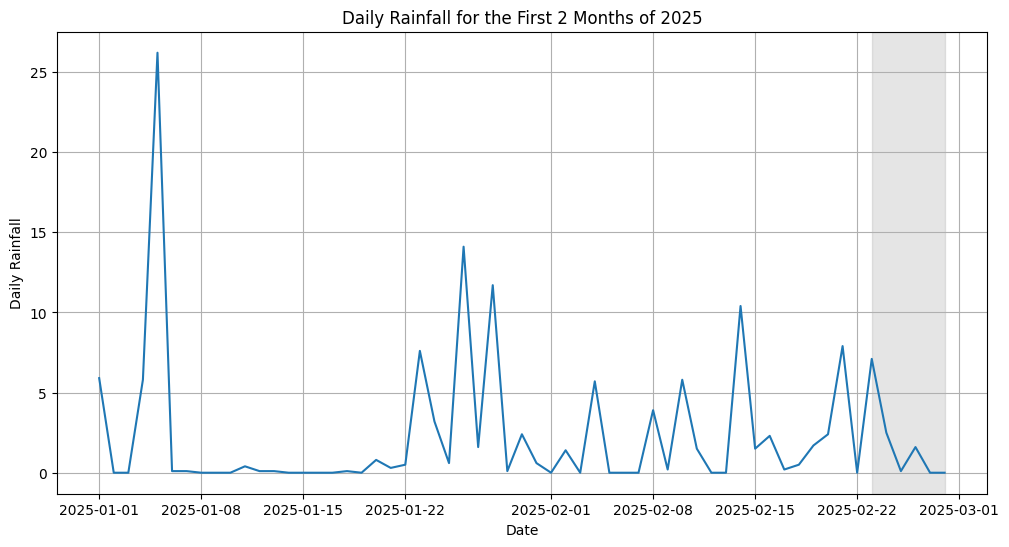

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['rain'])
plt.xlabel('Date')
plt.ylabel('Daily Rainfall')
plt.title('Daily Rainfall for the First 2 Months of 2025')
train_end = '2025-02-23'
test_end = '2025-02-28'
plt.axvspan(train_end, test_end, color='#808080', alpha=0.2)
plt.grid(True)
plt.show()

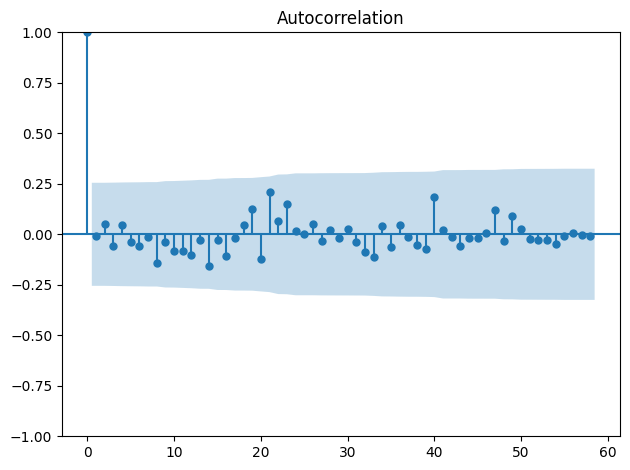

In [ ]:
plot_acf(df['rain'], lags=58);

plt.tight_layout()

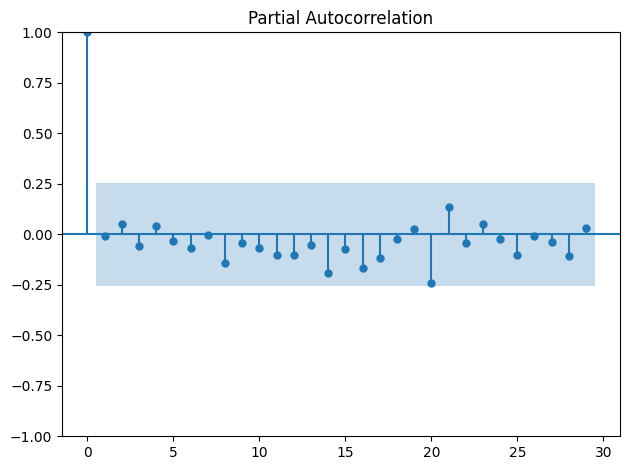

In [ ]:
plot_pacf(df['rain'], lags=29);

plt.tight_layout()

In [ ]:
def optimize_ARIMA(training_data, order_list, d) -> pd.DataFrame:

    results = []

    for order in tqdm_notebook(order_list):
        try:
            model = SARIMAX(training_data, order=(order[0], d, order[1]), simple_differencing=False).fit(disp=False)
            no_pars = order[0]+order[1]
        except:
            continue

        aic = model.aic
        bic= model.bic
        results.append([order, no_pars, aic, bic])

    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'NO. Parameters', 'AIC','BIC']

    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

    return result_df

In [ ]:
ps = range(0, 4, 1)
qs = range(0, 4, 1)
d = 0

order_list = list(product(ps, qs))
order_list

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3)]

In [ ]:
train = df['rain'][:-7]

result_df = optimize_ARIMA(train, order_list, d)
result_df

  0%|          | 0/16 [00:00<?, ?it/s]

,"(p,q)",NO. Parameters,AIC,BIC
0,"(1, 1)",2,317.227306,323.081037
1,"(2, 1)",3,319.198846,327.003821
2,"(1, 2)",3,319.201687,327.006662
3,"(2, 2)",4,320.751706,330.507924
4,"(3, 1)",4,321.061440,330.817659
5,"(1, 3)",4,321.068997,330.825216
6,"(2, 0)",2,322.020632,327.874363
7,"(1, 0)",1,322.033237,325.935724
8,"(0, 0)",0,322.322707,324.273950
9,"(0, 1)",1,322.706654,326.609142


In [ ]:
model = SARIMAX(train, order=(1,0,1), simple_differencing=False)
model_fit = model.fit(disp=False)

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   rain   No. Observations:                   52
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -155.614
Date:                Sat, 22 Mar 2025   AIC                            317.227
Time:                        16:22:26   BIC                            323.081
Sample:                             0   HQIC                           319.471
                                 - 52                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.001   1070.160      0.000       0.998       1.002
ma.L1         -0.9989      0.223     -4.480      0.000      -1.436      -0.562
sigma2        22.1399      0.010   2196.404      0.0

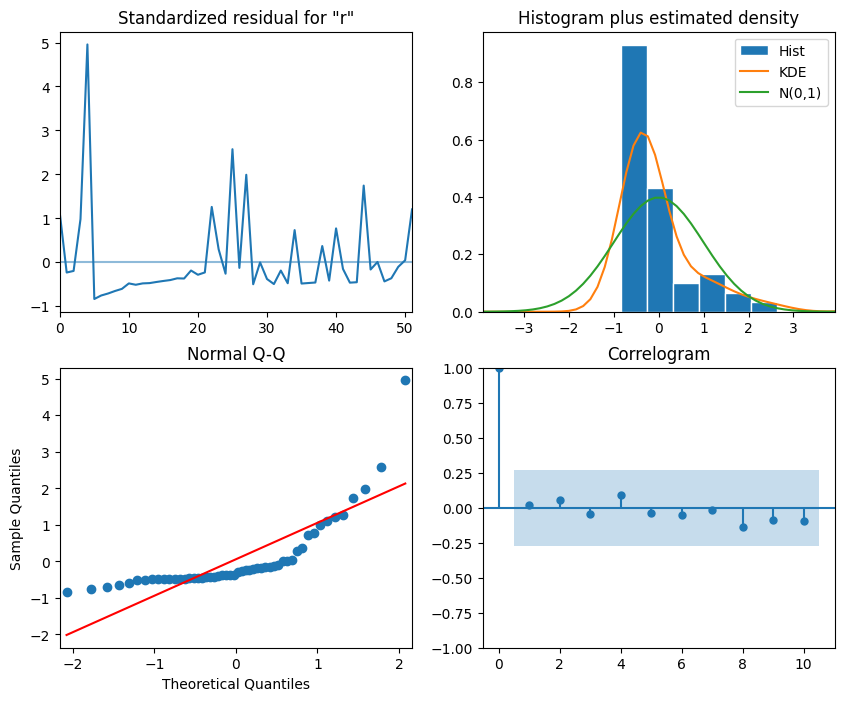

In [ ]:
model_fit.plot_diagnostics(figsize=(10,8));

**Overview**

The model identification process involved analysing the time series data to determine stationarity, seasonality, and potential model structures. Various statistical techniques, including autocorrelation and partial autocorrelation functions, were used to guide model selection.

**Data Visualisation and Initial Observations**

The dataset consists of daily rainfall measurements. To understand its characteristics, the following plots were generated:

1. ***Time Series Plot***: A visualization of daily rainfall for the first two months of 2025. This plot reveals overall trends and potential seasonal patterns.

2. ***Train-Test Split Visualization***: The dataset was divided into training and testing periods, with the training period ending on February 23, 2025, and the testing period covering the last few days of February. The division was highlighted in the time series plot.

3. ***Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) Plots***: These were generated to assess lag dependencies and identify the appropriate ARIMA or SARIMA model parameters.

4. ***Histogram and QQ Plot***: These were used to check the normality of residuals, which is crucial for validating model assumptions.

**Statistical Tests and Findings**

1. ***Augmented Dickey-Fuller (ADF) Test***: Conducted to check for stationarity. If the p-value was high, differencing was applied to achieve stationarity.

2. ***Ljung-Box Test***: Used to assess the independence of residuals and determine if autocorrelations were significant.

3. ***Model Selection Criteria***: AIC and BIC scores were evaluated for different models to choose the best-fitting one.

**Conclusion**

Based on the visualisations and statistical analyses, an appropriate time series model was selected. The next steps include model fitting, residual analysis, and forecasting to validate its predictive performance.

